![lop](../../images/logo_diive1_128px.png)

# **Heatmap of value ranks per year and month**
`.heatmapyearmonth_ranks()`

---
**Notebook version**: `1` (24 Mar 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Plots heatmap showing values (z) of time series as year (y) vs month (x).
- Time series must have monthly time resolution.
- This example uses 10 years of air temperature measurements, recorded at half-hourly time resolution that is resampled to monthly time resolution before plotting.
- `HeatmapDateTime` uses `HeatmapBase` (`diive.core.plotting.heatmap_base.HeatmapBase`) as base class.

</br>

# **Imports**

In [1]:
import diive as dv

import importlib.metadata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet_long
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.87.0


</br>

# **Docstring**

In [2]:
help(dv.heatmapyearmonth_ranks)

Help on class HeatmapYearMonthRanks in module diive.core.plotting.heatmap_datetime:

class HeatmapYearMonthRanks(builtins.object)
 |  HeatmapYearMonthRanks(agg: str = 'mean', z_var_name: str = None, title: str = None, ranks: bool = True, **kwargs)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, agg: str = 'mean', z_var_name: str = None, title: str = None, ranks: bool = True, **kwargs)
 |      Plot monthly ranks across years.
 |      
 |      Args:
 |          **kwargs: Parameters for HeatmapBase.
 |  
 |  plot(self)
 |  
 |  show(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object



</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet_long()
series = df['Tair_f'].copy()
series

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\local\exampledata_PARQUET_CH-DAV_FP2022.5_1997-2022_ID20230206154316_30MIN.parquet (0.053 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
1997-01-01 00:15:00   -7.850000
1997-01-01 00:45:00   -8.130000
1997-01-01 01:15:00   -7.890000
1997-01-01 01:45:00   -8.490000
1997-01-01 02:15:00   -8.130000
                         ...   
2022-12-31 21:45:00    3.463333
2022-12-31 22:15:00    5.283333
2022-12-31 22:45:00    5.536667
2022-12-31 23:15:00    4.963333
2022-12-31 23:45:00    6.490000
Freq: 30min, Name: Tair_f, Length: 455808, dtype: float64

In [4]:
# series.plot(x_compat=True);

</br>

# **Minimal example**

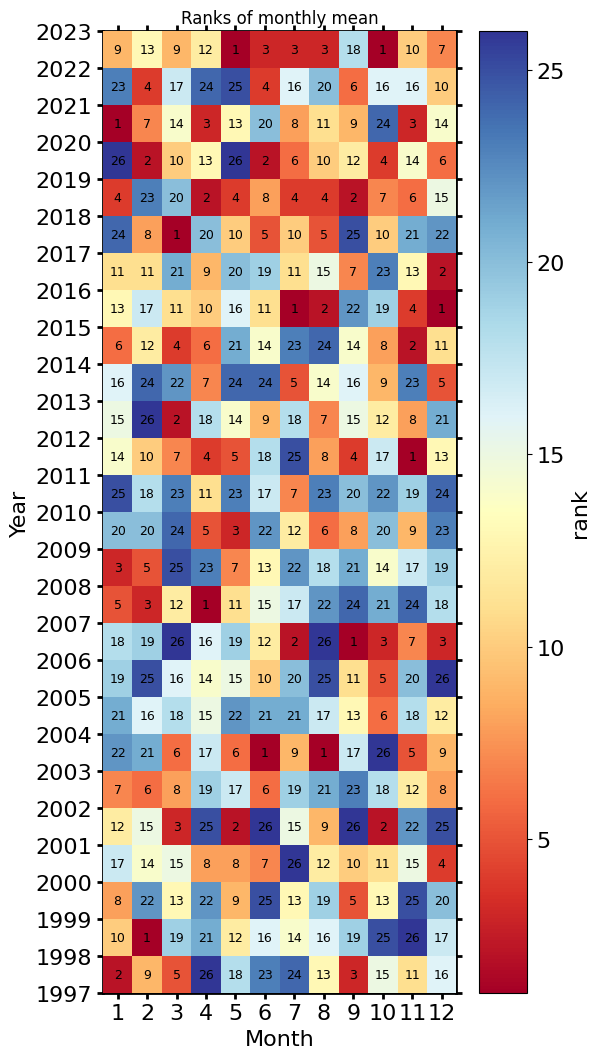

In [5]:
hm = dv.heatmapyearmonth_ranks(series=series)
hm.show()

## Get ax in which the plot was generated

In [6]:
this_ax = hm.hm.get_ax()
this_ax

<Axes: title={'center': 'Ranks of monthly mean'}, xlabel='Month', ylabel='Year'>

## Get data that was used to create the plot

In [7]:
plot_df = hm.hm.get_plot_data()
plot_df

x_vals,1,2,3,4,5,6,7,8,9,10,11,12
y_vals,,,,,,,,,,,,
1997,2.0,9.0,5.0,26.0,18.0,23.0,24.0,13.0,3.0,15.0,11.0,16.0
1998,10.0,1.0,19.0,21.0,12.0,16.0,14.0,16.0,19.0,25.0,26.0,17.0
1999,8.0,22.0,13.0,22.0,9.0,25.0,13.0,19.0,5.0,13.0,25.0,20.0
2000,17.0,14.0,15.0,8.0,8.0,7.0,26.0,12.0,10.0,11.0,15.0,4.0
2001,12.0,15.0,3.0,25.0,2.0,26.0,15.0,9.0,26.0,2.0,22.0,25.0
2002,7.0,6.0,8.0,19.0,17.0,6.0,19.0,21.0,23.0,18.0,12.0,8.0
2003,22.0,21.0,6.0,17.0,6.0,1.0,9.0,1.0,17.0,26.0,5.0,9.0
2004,21.0,16.0,18.0,15.0,22.0,21.0,21.0,17.0,13.0,6.0,18.0,12.0
2005,19.0,25.0,16.0,14.0,15.0,10.0,20.0,25.0,11.0,5.0,20.0,26.0


</br>

# **Example with all parameters**

Plotting heatmap  ...

Sanitizing timestamp ...
>>> Converting timestamp TIMESTAMP to datetime ... OK
>>> All rows have timestamp TIMESTAMP, no rows removed.
>>> Sorting timestamp TIMESTAMP ascending ...
>>> Removing data records with duplicate indexes ... OK (no duplicates found in timestamp index)
>>> Creating continuous <MonthBegin> timestamp index for timestamp TIMESTAMP between 1997-01-01 00:00:00 and 2022-12-01 00:00:00 ...
Preparing timestamp for heatmap plotting ...


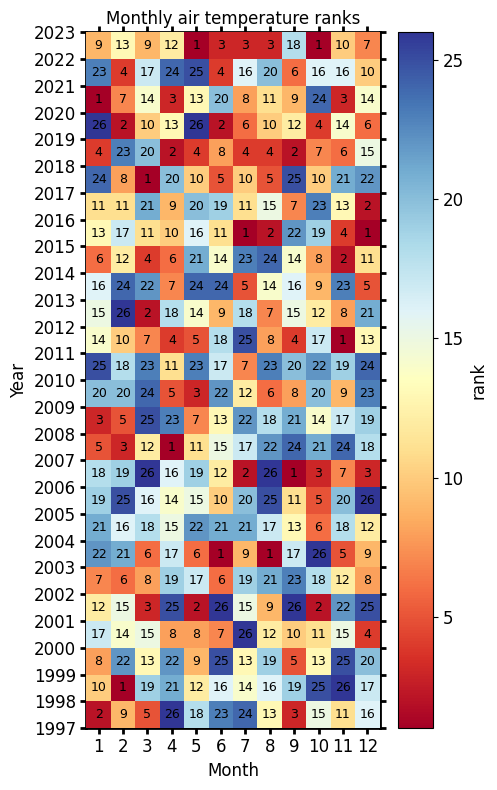

In [8]:
hm = dv.heatmapyearmonth_ranks(
    series=series, 
    agg='mean',
    z_var_name='air temperature',
    ranks=True,
    fig=None, 
    ax=None, 
    title="Monthly air temperature ranks",
    vmin=None, 
    vmax=None, 
    cb_digits_after_comma=0,
    cb_labelsize=12,
    axlabels_fontsize=12,
    ticks_labelsize=12,
    minyticks=3,
    maxyticks=10,
    cmap='RdYlBu',
    color_bad='grey',
    figsize=(5, 8),
    zlabel="rank",
    show_values=True,
    show_values_n_dec_places=0,
    verbose=True
)
hm.show()

</br>

# **Plot multiple heatmaps in one figure**

## Plot all aggregates next to each other in same figure

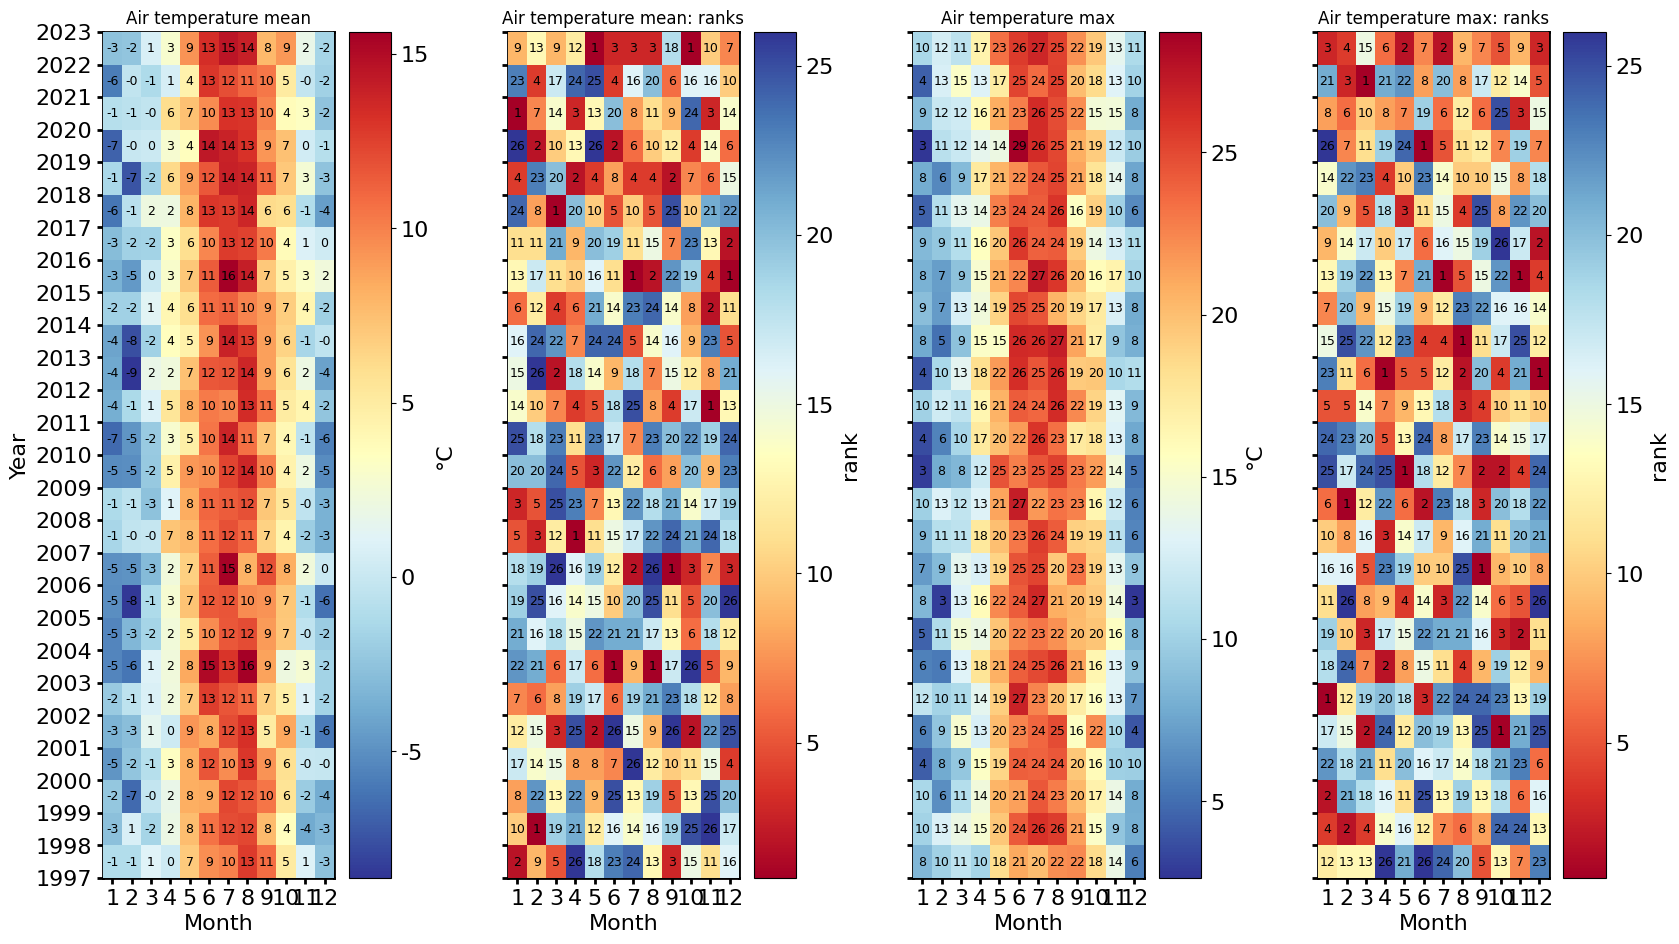

In [9]:
# Figure
fig = plt.figure(facecolor='white', figsize=(16, 9))

# Gridspec for layout
gs = gridspec.GridSpec(1, 4)  # rows, cols
gs.update(wspace=0.4, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)
ax_mean = fig.add_subplot(gs[0, 0])
ax_mean_ranks = fig.add_subplot(gs[0, 1])
ax_max = fig.add_subplot(gs[0, 2])
ax_max_ranks = fig.add_subplot(gs[0, 3])

dv.heatmapyearmonth_ranks(ax=ax_mean, series=series, agg='mean', ranks=False, zlabel="°C", cmap="RdYlBu_r").plot()
dv.heatmapyearmonth_ranks(ax=ax_mean_ranks, series=series, agg='mean').plot()
dv.heatmapyearmonth_ranks(ax=ax_max, series=series, agg='max', ranks=False, zlabel="°C", cmap="RdYlBu_r").plot()
dv.heatmapyearmonth_ranks(ax=ax_max_ranks, series=series, agg='max').plot()

ax_mean.set_title("Air temperature mean", color='black')
ax_mean_ranks.set_title("Air temperature mean: ranks", color='black')
ax_max.set_title("Air temperature max", color='black')
ax_max_ranks.set_title("Air temperature max: ranks", color='black')

ax_mean.tick_params(left=True, right=False, top=False, bottom=True,
                    labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax_mean_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                   labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_max_ranks.tick_params(left=True, right=False, top=False, bottom=True,
                     labelleft=False, labelright=False, labeltop=False, labelbottom=True)

ax_mean_ranks.set_ylabel("")
ax_max.set_ylabel("")
ax_max_ranks.set_ylabel("")

fig.show()

</br>

# **End of notebook**

In [10]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-05-16 22:45:54
